In [ ]:
import librosa
import numpy as np
from evoaudio.individual import BaseIndividual
from evoaudio.mutations import Mutator
from evoaudio.sample_library import SampleLibrary
from evoaudio.pitch import Pitch, DrumHit

sample_lib = SampleLibrary()

pitch_dict = {pitch.name: pitch.value for pitch in Pitch}
drum_dict = {DrumHit.name: DrumHit.value + 73 for DrumHit in DrumHit}

pitch_dict.update(drum_dict)

instruments = list(sample_lib.instruments.keys())

instrument_dict = {}
for i in range(len(instruments)):
    instrument_dict[instruments[i]] = i+1

style_list = []
for i in instruments:
    style_list = style_list + list(sample_lib.instruments[i].styles)

style_dict = {}
for i in range(len(style_list)):
    style_dict[style_list[i]] = i+1

def getLabel(x):
    label = []
    for n in range(5):
        if len(x.samples) > n:
            sampleTuple = [instrument_dict[str(x.samples[n].instrument)], style_dict[str(x.samples[n].style)], pitch_dict[str(x.samples[n].pitch.name)]]
            label = label + sampleTuple
        else:
            label = label + [0,0,0]
    return np.array(label)

def getSpec(x):
    mel_data = x.to_mixdown()[:(22050*5)]
    
    mel_spectrogram = librosa.feature.melspectrogram(y=mel_data, n_mels=216, hop_length=512)
    dbscale_mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)
    
    current_length = dbscale_mel_spectrogram.shape[1]
    if current_length < 216:
            
        pad_width = 216 - current_length
        dbscale_mel_spectrogram = np.pad(dbscale_mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant',constant_values=(-80,))

    return dbscale_mel_spectrogram


mutator = Mutator(sample_lib)
spectrograms = []
labels = []
max_time_steps = 0
for i in range(20000):
    if i%1000 == 0:
        print(i)
    
    x = BaseIndividual.create_random_individual(sample_lib=sample_lib) 
    spectrograms.append(getSpec(x))
    labels.append(getLabel(x))

    #for j in range(0):
    #    mutation = np.random.choice([mutator.mutate_instrument, mutator.mutate_pitch, mutator.mutate_n_samples])
     #   x_copy = BaseIndividual.from_copy(x)
      #  x_mut = mutation(x_copy)
       # spectrograms.append(getSpec(x_mut))
        #labels.append(getLabel(x_mut))

spectrograms_array = np.array(spectrograms)
labels_array = np.array(labels)

np.save('spectrograms.npy', spectrograms_array)
np.save('labels.npy', labels_array)

/home/philipp/miniconda3/envs/torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading samples: 100%|█████████████████████████████████████████████████████████████| 6826/6826 [00:09<00:00, 721.14it/s]


0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000


[[-48.41596  -44.215538 -43.96794  ... -80.       -80.       -80.      ]
 [-43.37072  -40.38702  -36.30602  ... -80.       -80.       -80.      ]
 [-41.365818 -37.21221  -34.163292 ... -80.       -80.       -80.      ]
 ...
 [-55.742104 -47.484875 -47.28547  ... -80.       -80.       -80.      ]
 [-67.72478  -61.164562 -62.167027 ... -80.       -80.       -80.      ]
 [-80.       -74.77745  -78.16931  ... -80.       -80.       -80.      ]]
(256, 216, 216)


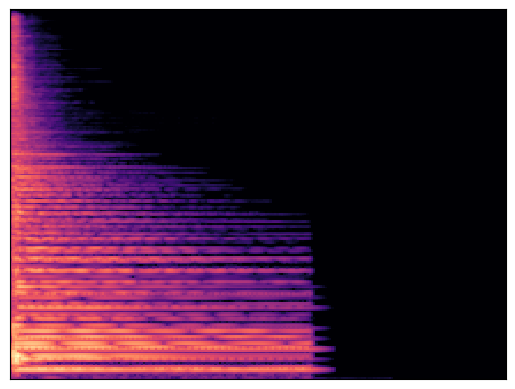

In [22]:
spec = np.load("spectrograms.npy")
librosa.display.specshow(spec[4])